# Tokenization 개념

참고 링크 : https://wikidocs.net/21698 (정독 권함)

주어진 텍스트에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 부릅니다. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다.  

일반적으로 토큰의 단위는 크게는 '문장' 작게는 '단어'라고 보시면 됩니다.

**토큰화는 일반적으로 여러분들이 직접 수행하시지 말고, 이미 구현되어져 있는 패키지에 의존하는 것이 훨씬 좋습니다.**

토큰화가 어떤 의미인지 실습을 통해서 이해해봅시다.

단어 단위로 토큰화를 수행하는 것을 단어 토큰화(Word Tokenization)라고 합니다. 영어와 한국어에 대해서 실습해볼까요?

---

#Word Tokenization

단어 단위로 토큰화를 수행하는 것을 단어 토큰화(Word Tokenization)라고 합니다.

## 영어 : Word Tokenization

영어로 토큰화를 할 때는 일반적으로 NLTK라는 패키지를 사용합니다. NTLK는 영어 자연어 처리를 위한 패키지라고 보시면 됩니다.  
Colab에서는 NLTK가 이미 설치되어져 있으므로 import nltk로 바로 사용하시면 됩니다.

NLTK에서는 다양한 영어 토크나이저(토큰화를 수행하는 도구)를 제공하고 있습니다.  
**토큰화 결과는 토크나이저마다 규칙이 조금씩 다릅니다. 어떤 토크나이저를 사용할 지 정답은 없습니다.**

어떤 토크나이저를 사용할 지는 여러분들의 선택입니다.

### **NLTK의 토크나이저 1. word_tokenize**

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/danny/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

아래의 문장을 보면 Don't와 Jone's에는 아포스트로피(')가 들어가있습니다.

In [ ]:
sentence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

**아포스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화할 수 있을까요?**



In [ ]:
from nltk.tokenize import word_tokenize  
print(word_tokenize(sentence))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


Don't를 Do와 n't로 분리하였으며, Jone's는 Jone과 's로 분리

---

### **NLTK의 토크나이저 2. WordPunctTokenizer**


In [ ]:
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize(sentence))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


Don't를 Don과 '와 t로 분리하였으며, Jone's를 Jone과 '와 s로 분리

**다시 말하지만 뭐가 더 좋은지 정답은 없습니다. 사실 토크나이저마다 각자 규칙이 다르기 때문에 사용하고자 하는 목적에 따라 토크나이저를 선택하는 것이 중요합니다.**

---

 ### **NLTK의 토크나이저 3. TreebankWordTokenizer**

Penn Treebank Tokenizer의 규칙

규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.  
규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.  

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


지금까지 주어진 문자열로부터 NLTK가 제공하는 토크나이저 3개를 사용하여 단어 토큰화를 수행해봤습니다.  

결과가 전부 다르죠?

---

### **띄어쓰기를 기준으로 하는 단어 토큰화 (잘 되는 것 같아도 가급적 No!)**

**사실 영어는 띄어쓰기를 기준으로 단어 토큰화를 한다고 하더라도 꽤 잘 되는 편입니다.**  
하지만 그럼에도 띄어쓰기를 기준으로 단어 토큰화를 하는 것은 하지 않는 것이 좋은데 그 이유를 이해해봅시다.

다음과 같은 영어 문장이 있다고 해봅시다.

In [ ]:
en_text = "A Dog Run back corner near spare bedrooms!!!!"

우선 앞서 배운 NLTK로 토큰화를 해봅시다.

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms', '!', '!', '!', '!']


잘 동작합니다.

이번에는 NLTK가 아닌 그냥 띄어쓰기 단위로 토큰화를 해봅시다.  
파이썬은 주어진 문자열에 .split()을 하면 띄어쓰기를 기준으로 전부 원소를 잘라서 리스트 형태로 리턴합니다.

In [ ]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms!!!!']


보이시나요? 이게 바로 띄어쓰기를 기준으로 단어 토큰화를 수행한 결과입니다.  

사실 영어는 NLTK라는 패키지를 사용하면 좀 더 섬세한 토큰화를 하기는 하지만, 띄어쓰기를 하는 것만으로도 거의 토큰화가 잘 되는 편입니다. 하지만 그럼에도 띄어쓰기를 기준으로 하는 것을 지양(하지마세요)하라는 것은 이유가 있습니다.  

예를 들어 영어 문장에 특수 문자를 추가해봅시다.

In [ ]:
en_text = "A Dog Run back corner near spare bedrooms... bedrooms!!"

NLTK로 토큰화를 해봅시다.

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

보시면 특수문자들도 알아서 다 띄워서 bedrooms이 정상적으로 분리되었습니다. 하지만 띄어쓰기 단위로 토큰화를 한다면요?

In [ ]:
print(en_text.split())

bedrooms와 ...가 붙어서 bedrooms...가 나오고,  
bedrooms와 !!!가 붙어서 bedrooms!!!가 나옵니다.  

파이썬이 보기에 이들은 전부 다른 단어로 인식합니다.

In [ ]:
if 'bedrooms' == 'bedrooms...':
  print('이 둘은 같습니다.')
else:
  print('이 둘은 다릅니다.')

In [ ]:
'bedrooms...' == 'bedrooms!!'

NLTK가 훨씬 섬세하게 동작한다는 것을 알 수 있습니다.

---

## 한국어 : Word Tokenization(KoNLPy)

### 띄어쓰기를 기준으로 하는 단어 토큰화 (그냥 No!)

사실 영어의 경우에는 띄어쓰기 단위로 토큰화를 해도 단어들 간 구분이 꽤나 명확한 편입니다. 하지만 한국어의 경우에는 토큰화 작업이 훨씬 까다롭습니다. 그 이유는 **한국어는 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되는 경우가 너무 너무 너무 많기 때문입니다.**

한국어는 띄어쓰기로 토큰화하는 것은 명확한 실험 목적이 없다면 거의 쓰지 않는 것이 좋습니다. 예시를 통해서 이해해봅시다.

In [ ]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


위의 예제에서는 '사과'란 단어가 총 4번 등장했는데  
모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다.

In [ ]:
'사과' == '사과의'

False

In [ ]:
'사과의' == '사과를'

False

In [ ]:
'사과를' == '사과가'

False

In [ ]:
'사과가' == '사과랑'

False

---

### 형태소 분석기

단어 토큰화를 위해서 영어에 NLTK가 있다면 한국어에는 형태소 분석기 패키지인 KoNLPy(코엔엘파이)가 존재합니다.  
KoNLPy는 Colab에 설치되어져 있지 않으므로 별도로 설치해줍니다.

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NLTK도 내부적으로 여러 토크나이저가 있던 것처럼 KoNLPy 또한 다양한 형태소 분석기를 가지고 있지만, Mecab이라는 형태소 분석기는 특이하게도 별도 설치를 해주어야 합니다.

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 3.66 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-02-21 04:54:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bb

In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

위 형태소 분석기들은 공통적으로 아래의 함수를 제공합니다.  
nouns : 명사 추출  
morphs : 형태소 추출  
pos : 품사 부착

### 형태소 분석기 Okt

In [ ]:
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


'못'

망치로 못을 두드리다 => '못' : 명사  
나 그 일 못해요. => '못' : 부사

### 형태소 분석기 꼬꼬마

In [ ]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


### 형태소 분석기 코모란

In [ ]:
print(komoran.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(komoran.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(komoran.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코', '당신', '연휴', '여행']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '아', '보', '아요']
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('아', 'EC'), ('보', 'VX'), ('아요', 'EC')]


### 형태소 분석기 한나눔

In [ ]:
print(hannanum.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(hannanum.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(hannanum.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에는', '여행', '을', '가', '아', '보', '아']
[('열심히', 'M'), ('코딩', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('당신', 'N'), (',', 'S'), ('연휴', 'N'), ('에는', 'J'), ('여행', 'N'), ('을', 'J'), ('가', 'P'), ('아', 'E'), ('보', 'P'), ('아', 'E')]


### 형태소 분석기 Mecab

In [ ]:
print(mecab.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(mecab.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(mecab.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('한', 'XSA+ETM'), ('당신', 'NP'), (',', 'SC'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('봐요', 'EC+VX+EC')]


**각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에**, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 예를 들어서 속도를 중시한다면 메캅을 사용할 수 있습니다.



참고 : https://iostream.tistory.com/144 (형태소 분석기 성능 비교)

# Sentence Tokenization

문장 토큰화는 단어 토큰화와는 달리 주어진 텍스트를 문장 단위로 나눌 경우에 사용합니다.

## 영어 : Sentence Tokenization (NLTK)

여러분들이 문자열이 주어졌을 때, 문장 단위로 나눈다고 가정해보세요.

Yonsei University is a private research university in Seoul, South Korea. Yonsei University is deemed as one of the three most prestigious institutions in the country. It is particularly respected in the studies of medicine and business administration.

In [ ]:
temp = 'Yonsei University is a private research university in Seoul, South Korea. Yonsei University is deemed as one of the three most prestigious institutions in the country. It is particularly respected in the studies of medicine and business administration.'

문자열.split('자르는 기준')을 사용하면 해당 기준으로 문자열들을 분리하여 리스트 형태로 반환합니다.  
아래의 코드는 온점을 기준으로 문자열을 자르는 코드입니다.

In [ ]:
temp.split('. ')

['Yonsei University is a private research university in Seoul, South Korea',
 'Yonsei University is deemed as one of the three most prestigious institutions in the country',
 'It is particularly respected in the studies of medicine and business administration.']

직관적으로 생각해봤을 때는 ?나 온점(.)이나 ! 기준으로 문장을 잘라내면 되지 않을까라고 생각할 수 있지만, 꼭 그렇지만은 않습니다. !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 온점은 꼭 그렇지 않기 때문입니다. 다시 말해, 온점은 문장의 끝이 아니더라도 등장할 수 있습니다.

**IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘. 그러고나서 점심 먹으러 가자.**  
**Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.**

온점을 기준으로 문장을 구분할 경우에는 예외사항이 너무 많습니다.  
**NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원하고 있습니다. **

In [ ]:
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mae sure no one was near."

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to mae sure no one was near.']


In [ ]:
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


## 한국어 : Sentence Tokenization(KSS)

In [ ]:
pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kss-4.5.1.tar.gz (77 kB)
  Preparing metadata (setup.py) ... done
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Using cached pecab-1.0.8.tar.gz (26.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.1-py3-none-any.whl size=53218 sha256=07da92ec17cedb06be58f14628bac228d00d1513e1a943b46d8088ffbeed78c2
  Stored in directory: /root/.cache/pip/wheels/8c/f9/05/a93eb0defc9eed494ee4d42e3d9076fade98f08982f41cf09f
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646667 sha256=38464e2ad20424480f694a3a4f51d9a429e8f62ee7f3d6075da496da550a3e2c
  Stored in directory: /root/.cache/pip/wheels/a9/98/a3/085a909aa25805f321467a3af3b80d43b6094ed335b4818775
Successfully built kss pecab


In [ ]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요.', '이제 해보면 알걸요?']


# IDMB 리뷰 데이터를 이용한 정수 인코딩과 패딩



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/Text%20Classification/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x7f3422cc28b0>)

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print('결측값 여부 :',df.isnull().values.any())

결측값 여부 : False


<Axes: >

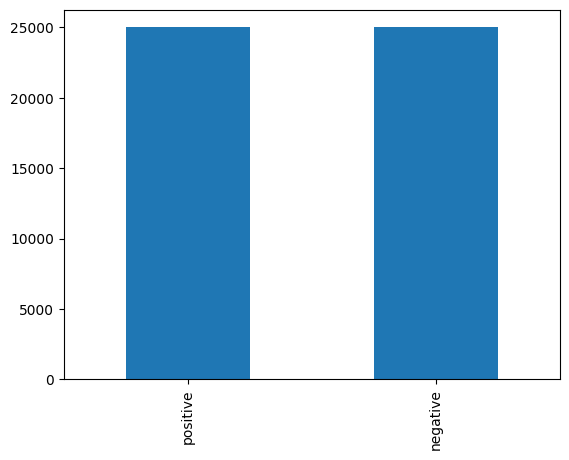

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
print('레이블 개수')
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
  sentiment  count
0  negative  25000
1  positive  25000


In [ ]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])

In [ ]:
df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [ ]:
X_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

영화 리뷰의 개수: 50000
레이블의 개수: 50000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)

In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'긍정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'부정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'긍정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'부정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
긍정 리뷰 = 50.0%
부정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
긍정 리뷰 = 50.0%
부정 리뷰 = 50.0%


In [ ]:
X_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
sample = word_tokenize(X_train[0])

In [ ]:
print(sample)

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'They', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', '.', 'Trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'Its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', '.', 

In [ ]:
lower_sample = [word.lower() for word in sample]

In [ ]:
print(lower_sample)

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'they', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 

In [ ]:
'apple' == 'apple'

True

In [ ]:
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent)
    tokenized_sent = [word.lower() for word in tokenized_sent]
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

In [ ]:
tokenized_X_train = tokenize(X_train)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [00:41<00:00, 607.31it/s]


In [ ]:
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)

['life', 'is', 'too', 'short', 'to', 'waste', 'on', 'two', 'hours', 'of', 'hollywood', 'nonsense', 'like', 'this', ',', 'unless', 'you', "'re", 'a', 'clueless', 'naiive', '16', 'year', 'old', 'girl', 'with', 'no', 'sense', 'of', 'reality', 'and', 'nothing', 'better', 'to', 'do', '.', 'dull', 'characters', ',', 'poor', 'acting', '(', 'artificial', 'emotion', ')', ',', 'weak', 'story', ',', 'slow', 'pace', ',', 'and', 'most', 'important', 'to', 'this', 'films', 'flawed', 'existence-no', 'one', 'cares', 'about', 'the', 'overly', 'dramatic', 'relationship', '.']
['for', 'those', 'who', 'expect', 'documentaries', 'to', 'be', 'objective', 'creatures', ',', 'let', 'me', 'give', 'you', 'a', 'little', 'lesson', 'in', 'american', 'film-making.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'documentaries', 'rely', 'heavily', 'on', 'casting', '.', 'you', 'pick', 'and', 'choose', 'characters', 'you', 'think', 'will', 'enhance', 'the', 'drama', 'and', 'entertainment', 'value', 'of', 'your', 'film.', '

In [ ]:
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 112946


In [ ]:
print(word_counts)

Counter({'the': 332140, ',': 271720, '.': 234036, 'and': 161143, 'a': 161005, 'of': 144426, 'to': 133327, 'is': 107917, '/': 100449, '>': 100324, '<': 100220, 'br': 100168, 'it': 94327, 'in': 92249, 'i': 86574, 'this': 74636, 'that': 71463, "'s": 60982, 'was': 49717, 'as': 46045, 'with': 43565, 'for': 43220, 'movie': 42174, 'but': 41604, 'film': 38621, ')': 35447, '(': 34661, 'you': 34352, 'on': 33299, "n't": 32917, "''": 32808, '``': 32316, 'not': 31021, 'are': 29947, 'he': 28740, 'his': 28579, 'have': 28337, 'be': 26416, 'one': 25891, '!': 25010, 'at': 23409, 'they': 22893, 'all': 22868, 'by': 22083, 'an': 21402, 'who': 20858, 'from': 20215, 'so': 19909, 'like': 19676, 'there': 18493, 'or': 17725, 'just': 17384, 'do': 17309, 'her': 17142, 'if': 16996, 'about': 16970, 'has': 16934, 'out': 16421, '?': 16332, 'what': 15882, 'some': 15501, 'when': 14152, 'good': 14128, 'more': 13914, 'very': 13691, 'she': 13553, 'would': 13214, 'up': 12265, 'my': 12252, 'even': 12242, 'no': 12213, 'can':

In [ ]:
word_counts['bridesmaid']

1

In [ ]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_counts['love'])

훈련 데이터에서의 단어 the의 등장 횟수 : 332140
훈련 데이터에서의 단어 love의 등장 횟수 : 6260


In [ ]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']


In [ ]:
print(vocab)

['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>', '<', 'br', 'it', 'in', 'i', 'this', 'that', "'s", 'was', 'as', 'with', 'for', 'movie', 'but', 'film', ')', '(', 'you', 'on', "n't", "''", '``', 'not', 'are', 'he', 'his', 'have', 'be', 'one', '!', 'at', 'they', 'all', 'by', 'an', 'who', 'from', 'so', 'like', 'there', 'or', 'just', 'do', 'her', 'if', 'about', 'has', 'out', '?', 'what', 'some', 'when', 'good', 'more', 'very', 'she', 'would', 'up', 'my', 'even', 'no', 'can', 'time', 'which', 'only', 'really', 'their', 'see', 'had', 'story', 'were', 'did', 'we', 'me', 'does', '...', "'", 'much', 'well', '-', ':', 'than', 'could', 'been', 'get', 'will', 'other', 'into', 'great', 'also', 'people', 'bad', 'most', 'because', 'how', 'first', 'him', 'its', 'then', 'them', 'make', 'made', 'way', 'after', 'any', 'too', 'movies', 'characters', 'think', 'character', '*', 'films', ';', 'watch', 'being', 'many', 'seen', 'two', 'never', 'where', 'acting', 'love', 'plot', 'know', 'best', 'little'

In [ ]:
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 112946
등장 빈도가 2번 이하인 희귀 단어의 수: 69670
단어 집합에서 희귀 단어의 비율: 61.68434473111044
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1946121064938062


등장 빈도가 threshold 값인 3회 미만. 즉, 2회 이하인 단어들은 단어 집합에서 무려 60% 이상을 차지합니다. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.19%밖에 되지 않습니다. 아무래도 등장 빈도가 2회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 합니다. 그래서 이 단어들은 정수 인코딩 과정에서 배제시키겠습니다.

등장 빈도수가 2이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한하겠습니다.

In [ ]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 43276


In [ ]:
print(vocab)

['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>', '<', 'br', 'it', 'in', 'i', 'this', 'that', "'s", 'was', 'as', 'with', 'for', 'movie', 'but', 'film', ')', '(', 'you', 'on', "n't", "''", '``', 'not', 'are', 'he', 'his', 'have', 'be', 'one', '!', 'at', 'they', 'all', 'by', 'an', 'who', 'from', 'so', 'like', 'there', 'or', 'just', 'do', 'her', 'if', 'about', 'has', 'out', '?', 'what', 'some', 'when', 'good', 'more', 'very', 'she', 'would', 'up', 'my', 'even', 'no', 'can', 'time', 'which', 'only', 'really', 'their', 'see', 'had', 'story', 'were', 'did', 'we', 'me', 'does', '...', "'", 'much', 'well', '-', ':', 'than', 'could', 'been', 'get', 'will', 'other', 'into', 'great', 'also', 'people', 'bad', 'most', 'because', 'how', 'first', 'him', 'its', 'then', 'them', 'make', 'made', 'way', 'after', 'any', 'too', 'movies', 'characters', 'think', 'character', '*', 'films', ';', 'watch', 'being', 'many', 'seen', 'two', 'never', 'where', 'acting', 'love', 'plot', 'know', 'best', 'little'

In [ ]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

In [ ]:
for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

In [ ]:
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, 'the': 2, ',': 3, '.': 4, 'and': 5, 'a': 6, 'of': 7, 'to': 8, 'is': 9, '/': 10, '>': 11, '<': 12, 'br': 13, 'it': 14, 'in': 15, 'i': 16, 'this': 17, 'that': 18, "'s": 19, 'was': 20, 'as': 21, 'with': 22, 'for': 23, 'movie': 24, 'but': 25, 'film': 26, ')': 27, '(': 28, 'you': 29, 'on': 30, "n't": 31, "''": 32, '``': 33, 'not': 34, 'are': 35, 'he': 36, 'his': 37, 'have': 38, 'be': 39, 'one': 40, '!': 41, 'at': 42, 'they': 43, 'all': 44, 'by': 45, 'an': 46, 'who': 47, 'from': 48, 'so': 49, 'like': 50, 'there': 51, 'or': 52, 'just': 53, 'do': 54, 'her': 55, 'if': 56, 'about': 57, 'has': 58, 'out': 59, '?': 60, 'what': 61, 'some': 62, 'when': 63, 'good': 64, 'more': 65, 'very': 66, 'she': 67, 'would': 68, 'up': 69, 'my': 70, 'even': 71, 'no': 72, 'can': 73, 'time': 74, 'which': 75, 'only': 76, 'really': 77, 'their': 78, 'see': 79, 'had': 80, 'story': 81, 'were': 82, 'did': 83, 'we': 84, 'me': 85, 'does': 86, '...': 87, "'": 88, 'much': 89, 'well': 90, '-': 91, ':': 

In [ ]:
vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 43278


In [ ]:
print('단어 <PAD>와 맵핑되는 정수 :', word_to_index['<PAD>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_to_index['<UNK>'])
print('단어 the와 맵핑되는 정수 :', word_to_index['the'])

단어 <PAD>와 맵핑되는 정수 : 0
단어 <UNK>와 맵핑되는 정수 : 1
단어 the와 맵핑되는 정수 : 2


In [ ]:
word_to_index['bridesmaid']

KeyError: ignored

In [ ]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

In [ ]:
print(tokenized_X_train[0])

['life', 'is', 'too', 'short', 'to', 'waste', 'on', 'two', 'hours', 'of', 'hollywood', 'nonsense', 'like', 'this', ',', 'unless', 'you', "'re", 'a', 'clueless', 'naiive', '16', 'year', 'old', 'girl', 'with', 'no', 'sense', 'of', 'reality', 'and', 'nothing', 'better', 'to', 'do', '.', 'dull', 'characters', ',', 'poor', 'acting', '(', 'artificial', 'emotion', ')', ',', 'weak', 'story', ',', 'slow', 'pace', ',', 'and', 'most', 'important', 'to', 'this', 'films', 'flawed', 'existence-no', 'one', 'cares', 'about', 'the', 'overly', 'dramatic', 'relationship', '.']


In [ ]:
print(tokenized_X_train[1])

['for', 'those', 'who', 'expect', 'documentaries', 'to', 'be', 'objective', 'creatures', ',', 'let', 'me', 'give', 'you', 'a', 'little', 'lesson', 'in', 'american', 'film-making.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'documentaries', 'rely', 'heavily', 'on', 'casting', '.', 'you', 'pick', 'and', 'choose', 'characters', 'you', 'think', 'will', 'enhance', 'the', 'drama', 'and', 'entertainment', 'value', 'of', 'your', 'film.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'after', 'you', 'have', 'shot', 'a', 'ton', 'of', 'footage', ',', 'you', 'splice', 'it', 'together', 'to', 'make', 'a', 'film', 'with', 'ups', 'and', 'downs', ',', 'turning', 'points', ',', 'climaxes', ',', 'etc', '.', 'if', 'you', 'have', 'trouble', 'with', 'existing', 'footage', ',', 'you', 'either', 'shoot', 'some', 'more', 'that', 'makes', 'sense', ',', 'find', 'some', 'stock', 'footage', ',', 'or', 'be', 'clever', 'with', 'your', 'narration.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'allegation', 'that', 

In [ ]:
len(tokenized_X_train[0])

68

In [ ]:
len(tokenized_X_train[1])

325

In [ ]:
encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

'UNK' => 'Unknown' => 모르는 단어가 등장했을 경우 맵핑하는 용도로 사용되는 스페셜 토큰.

In [ ]:
print(encoded_X_train[0])

[139, 9, 117, 353, 8, 459, 30, 129, 635, 7, 360, 1934, 50, 17, 3, 898, 29, 192, 6, 5485, 1, 4041, 346, 188, 261, 22, 72, 307, 7, 605, 5, 176, 143, 8, 54, 4, 772, 119, 3, 351, 132, 28, 4786, 1386, 27, 3, 838, 81, 3, 617, 1057, 3, 5, 104, 681, 8, 17, 123, 2958, 1, 40, 1994, 57, 2, 2346, 950, 632, 4]


In [ ]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

[139, 9, 117, 353, 8, 459, 30, 129, 635, 7, 360, 1934, 50, 17, 3, 898, 29, 192, 6, 5485, 1, 4041, 346, 188, 261, 22, 72, 307, 7, 605, 5, 176, 143, 8, 54, 4, 772, 119, 3, 351, 132, 28, 4786, 1386, 27, 3, 838, 81, 3, 617, 1057, 3, 5, 104, 681, 8, 17, 123, 2958, 1, 40, 1994, 57, 2, 2346, 950, 632, 4]
[23, 162, 47, 523, 3283, 8, 39, 4717, 1973, 3, 289, 85, 214, 29, 6, 137, 2055, 15, 323, 17765, 12, 13, 10, 11, 12, 13, 10, 11, 3283, 5197, 2685, 30, 1062, 4, 29, 1178, 5, 2131, 119, 29, 120, 97, 7771, 2, 478, 5, 731, 1127, 7, 141, 831, 12, 13, 10, 11, 12, 13, 10, 11, 115, 29, 38, 333, 6, 6539, 7, 814, 3, 29, 23864, 14, 313, 8, 112, 6, 26, 22, 3823, 5, 7772, 3, 1552, 828, 3, 14440, 3, 601, 4, 56, 29, 38, 1086, 22, 7534, 814, 3, 29, 372, 1349, 62, 65, 18, 178, 307, 3, 175, 62, 1707, 814, 3, 52, 39, 1024, 22, 141, 1, 12, 13, 10, 11, 12, 13, 10, 11, 2, 1, 18, 2, 1032, 347, 814, 7, 9750, 34, 190, 7, 2, 24, 28, 19746, 378, 8, 326, 10717, 27, 86, 34, 6726, 48, 2, 1127, 7, 2, 26, 21, 6, 950, 428, 5, 

In [ ]:
len(encoded_X_train[0])

68

In [ ]:
len(encoded_X_train[1])

325

In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [ ]:
print(word_to_index)
print(index_to_word)

{'<PAD>': 0, '<UNK>': 1, 'the': 2, ',': 3, '.': 4, 'and': 5, 'a': 6, 'of': 7, 'to': 8, 'is': 9, '/': 10, '>': 11, '<': 12, 'br': 13, 'it': 14, 'in': 15, 'i': 16, 'this': 17, 'that': 18, "'s": 19, 'was': 20, 'as': 21, 'with': 22, 'for': 23, 'movie': 24, 'but': 25, 'film': 26, ')': 27, '(': 28, 'you': 29, 'on': 30, "n't": 31, "''": 32, '``': 33, 'not': 34, 'are': 35, 'he': 36, 'his': 37, 'have': 38, 'be': 39, 'one': 40, '!': 41, 'at': 42, 'they': 43, 'all': 44, 'by': 45, 'an': 46, 'who': 47, 'from': 48, 'so': 49, 'like': 50, 'there': 51, 'or': 52, 'just': 53, 'do': 54, 'her': 55, 'if': 56, 'about': 57, 'has': 58, 'out': 59, '?': 60, 'what': 61, 'some': 62, 'when': 63, 'good': 64, 'more': 65, 'very': 66, 'she': 67, 'would': 68, 'up': 69, 'my': 70, 'even': 71, 'no': 72, 'can': 73, 'time': 74, 'which': 75, 'only': 76, 'really': 77, 'their': 78, 'see': 79, 'had': 80, 'story': 81, 'were': 82, 'did': 83, 'we': 84, 'me': 85, 'does': 86, '...': 87, "'": 88, 'much': 89, 'well': 90, '-': 91, ':': 

`<unk>` = unknown : 모르는 단어가 등장하면 맵핑하는 용도의 스페셜 토큰

In [ ]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['life', 'is', 'too', 'short', 'to', 'waste', 'on', 'two', 'hours', 'of', 'hollywood', 'nonsense', 'like', 'this', ',', 'unless', 'you', "'re", 'a', 'clueless', 'naiive', '16', 'year', 'old', 'girl', 'with', 'no', 'sense', 'of', 'reality', 'and', 'nothing', 'better', 'to', 'do', '.', 'dull', 'characters', ',', 'poor', 'acting', '(', 'artificial', 'emotion', ')', ',', 'weak', 'story', ',', 'slow', 'pace', ',', 'and', 'most', 'important', 'to', 'this', 'films', 'flawed', 'existence-no', 'one', 'cares', 'about', 'the', 'overly', 'dramatic', 'relationship', '.']
복원된 첫번째 샘플 : ['life', 'is', 'too', 'short', 'to', 'waste', 'on', 'two', 'hours', 'of', 'hollywood', 'nonsense', 'like', 'this', ',', 'unless', 'you', "'re", 'a', 'clueless', '<UNK>', '16', 'year', 'old', 'girl', 'with', 'no', 'sense', 'of', 'reality', 'and', 'nothing', 'better', 'to', 'do', '.', 'dull', 'characters', ',', 'poor', 'acting', '(', 'artificial', 'emotion', ')', ',', 'weak', 'story', ',', 'slow', 'pace', ',

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.0998


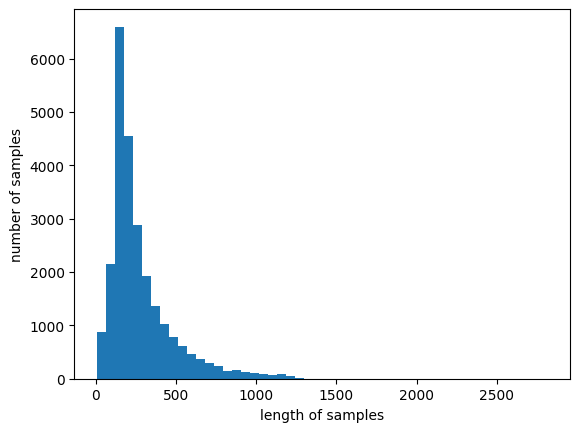

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.836


In [ ]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

In [ ]:
padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

In [ ]:
print('훈련 데이터의 크기 :', padded_X_train.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (25000, 500)
테스트 데이터의 크기 : (25000, 500)


In [ ]:
padded_X_train[:5]

array([[ 139,    9,  117, ...,    0,    0,    0],
       [  23,  162,   47, ...,    0,    0,    0],
       [  23,   40,  347, ...,    0,    0,    0],
       [  17,   24,   20, ...,    0,    0,    0],
       [1827,   92,  134, ...,    0,    0,    0]])

In [ ]:
len(padded_X_train[0])

500

In [ ]:
print(padded_X_train[0])

[ 139    9  117  353    8  459   30  129  635    7  360 1934   50   17
    3  898   29  192    6 5485    1 4041  346  188  261   22   72  307
    7  605    5  176  143    8   54    4  772  119    3  351  132   28
 4786 1386   27    3  838   81    3  617 1057    3    5  104  681    8
   17  123 2958    1   40 1994   57    2 2346  950  632    4    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 